In [43]:
import tensorflow as tf
import cv2 
import os 
import matplotlib.pyplot as plt 
import numpy as np


# AFTER IMPORTING ALL THESE LIBRARIES,  WE WILL READ AN IMAGE INSIDE 

In [44]:
img_array = cv2.imread("dataset/Mask/00000_Mask.jpg") # file path 

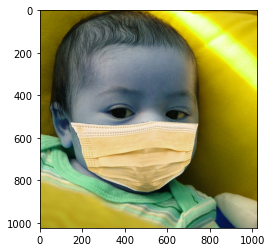

In [45]:
plt.imshow(img_array) # shows the image selected

# BY DEFAULT, THE COLOR OF THE IMAGE IS LIKE FROM THE ABOVE

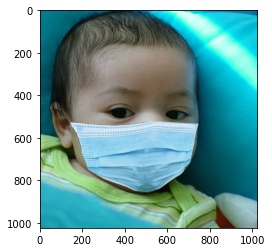

In [46]:
plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)) # USING THIS CODE, WE WILL CHANGE THE COLOR OF THE IMAGE 

In [47]:
img_array.shape #IN THIS CODE WE WILL KNOW  THE DIMENSION OF THE IMAGE 

(1024, 1024, 3)

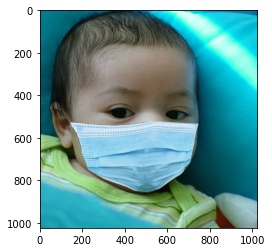

In [48]:
Datadirectory = "dataset/" ## Training dataset 
Classes = ["Mask", "Without_Mask"] # WE WILL GET THE TWO 'CLASSES' WHICH IS 'Mask' and 'WITHOUT FACEMASK' and storing it into a list

# an image that has Mask will be a the '0' position
# and the image 'without mask' is a the '1' position

for category in Classes: # the classes will named 'Category'
    path = os.path.join(Datadirectory, category) # pass the two 'Datadirectory' and 'Classes'
    for img in os.listdir(path): # then we will loop through the 'path' and find the existing images inside the path
        img_array = cv2.imread(os.path.join(path,img)) # pass the 'path' and 'img' to an array so we will have its path and its image
        # BACK TO RGB = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show() # shows the first image by breaking the loop
        break
    break

# NEXT, WE WILL RESIZE THE IMAGES INTO A ONE SIZE


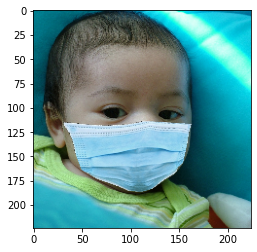

In [49]:



img_size = 224 # ImageNet => 224 x 224 
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [50]:
new_array.shape # checks again if the image is resize

(224, 224, 3)

# AS YOU CAN SEE, IF WE CHECK THE DIMENSION THE IMAGE IS ALREADY RESIZE INTO 224x224 size

# NEXT STEP, READING THE IMAGES AND CONVERTING IT ALL INTO AN ARRAY

In [51]:
training_data = []

def create_training_data(): # First we created a function
    for category in Classes: # using category again, we will loop through 'classes'
        path = os.path.join(Datadirectory, category)
        Class_num = Classes.index(category) ## 0 or 1 this is the Label
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array,(img_size, img_size))
                training_data.append([new_array,Class_num])
            except Exception as e:
                pass

In [52]:
create_training_data() # lets call the function

In [53]:
print(len(training_data))

99


In [54]:
import random

random.shuffle(training_data) # lets shuffle the images in order to stop model to learn its pattern

In [55]:
X = [] # Data / Images
y = [] # Label / Mask or without mask

for features, label in training_data: 
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, img_size,img_size, 3)
X.shape


(99, 224, 224, 3)

In [56]:
# normalize data

X = X/225.0 # we are normalizing it 

In [57]:
y[78]

1

In [66]:
y[15]

1

In [67]:
Y = np.array(y)

# Save all the pre-processing code

# Pickle is the standard way of serializing objects in Python. You can use the pickle operation to serialize your machine learning algorithms and #save the serialized format to a file. Later you can load this file to deserialize your model and use it to make new predictions.

In [68]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

# Once you want to load everything, just run the code below

In [69]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)

# Start of deep learning model for training which is Transfer learning

In [70]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers

In [71]:
model = tf.keras.applications.mobilenet.MobileNet() # pre trained model 

# Transfer learning - tuning, weights will start from last check point

In [72]:
model.summary() 

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

# We will reduce the layer or Parameters inside the model (Keras)

In [73]:
base_input = model.layers[0].input
base_output = model.layers[-4].output

In [74]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer) # 0 , 1
final_ouput = layers.Activation('sigmoid')(final_output) # final output

In [75]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [76]:
new_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0   

# settings for binary classification (Mask/ Without Facemask)

In [77]:
new_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics =["accuracy"]) # we will set the binary classification

In [79]:
new_model.fit(X,Y, epochs = 1, validation_split = 0.1) # now, we are training the model

3/3 [==============================] - 29s 9s/step - loss: 0.2022 - accuracy: 0.9775 - val_loss: 1.5425 - val_accuracy: 0.9000


In [ ]:
 # if i want to freeze a layer 
    
    for layer in model.layer:
        layer[].trainable = false
        
        or do it like this
        
    model.layers[0].trainable =false

In [80]:
new_model.save('my_model32421.h5') # saves the model

In [81]:
new_model = tf.keras.models.load_model('my_model32421.h5') # loads the model 

# checking the network for predictions

In [82]:
frame = cv2.imread('00001_Mask.jpg')

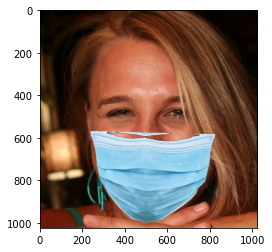

In [83]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [84]:
final_image = cv2.resize(frame, (224,224))
final_image = np.expand_dims(final_image, axis=0) #need fourth dimension
final_image = final_image/255.0

In [85]:
Predictions = new_model.predict(final_image)

In [87]:
Predictions

array([[-15.552828]], dtype=float32)

In [88]:
frame = cv2.imread('download.jpg')

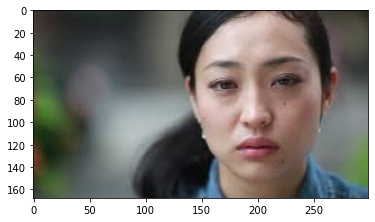

In [89]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [90]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [91]:
gray =cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [92]:
gray.shape

(168, 299)

# this will detect the four corner of the face

In [93]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h,x:x+w]
    cv2.rectangle(frame,(x,y),(x+w, y+h),(255,0,0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess)== 0:
        print("Face not detected")
    else:
        for(ex,ey,ew, eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex+ ew] #this will crop the face

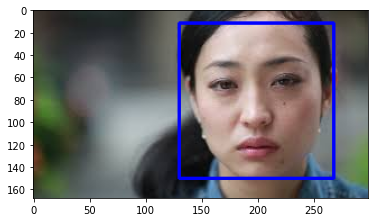

In [94]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [95]:
final_image = cv2.resize(frame, (224,224))
final_image = np.expand_dims(final_image, axis=0) #need fourth dimension
final_image = final_image/255.0

In [96]:
Predictions = new_model.predict(final_image)

In [97]:
Predictions

array([[0.324089]], dtype=float32)

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import numpy as np
import cv2     # pip install opencv-python
               # pip install opencv-contrib-python     for full package
               # from deepface import DeepFace        pip install deepface
path = "haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

# set the rectangle background to white
rectangle_bgr = (255, 255, 255)

# make a black image
img = np.zeros((500,500))

# set some text
text = "Some text in a box"

# get the width and height of the text box
(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]

# set teh text start position
text_offset_x = 10
text_offset_y = img.shape[0] - 25

# make the coords of the box with a small padding of two pixels
box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height -2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0,0,0), thickness=1)

cap = cv2.VideoCapture(-1)
# Check if the webcam is opend correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 0, 0), 2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("No Face Detected")
        else:
            for (ex,ey,ew,eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex: ex+ew]    # cropping the face
    
    final_image = cv2.resize(face_roi, (224,224))
    final_image = np.expand_dims(final_image, axis=0) # need fourth dimension
    final_image = final_image/255.0
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    Predictions = new_model.predict(final_image)
    
    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN
    
    if (Predictions>0):
        status = "No Mask"
        
        x1, y1, w1, h1 = 0, 0, 175, 75
        # Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        
        # Add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100,150), font, 3, (0,0,255), 2, cv2.LINE_4)
        
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,0,255))
    else:
        status = "Face Mask"
        
        x1, y1, w1, h1 = 0, 0, 175, 75
        # Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        
         # Add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100,150), font, 3, (0,255,0), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0))
    
    # Draw rectangle around the faces
    # for (x,y,w,h) in faces:
    #     cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0),2)
    
    # Use puttext() method for inserting text on video
    
    cv2.imshow('Face Mask Detection ', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        

cap.release()
cv2.destroyAllWindows()

No Face Detected
No Face Detected
No Face Detected
No Face Detected
No Face Detected
No Face Detected
No Face Detected
No Face Detected
No Face Detected
No Face Detected
No Face Detected
No Face Detected
No Face Detected
No Face Detected
No Face Detected
No Face Detected
No Face Detected
No Face Detected
No Face Detected
No Face Detected
No Face Detected
No Face Detected
No Face Detected
No Face Detected
No Face Detected
No Face Detected
No Face Detected
No Face Detected
No Face Detected
No Face Detected
No Face Detected
No Face Detected
No Face Detected
No Face Detected
No Face Detected
No Face Detected
No Face Detected
No Face Detected
No Face Detected
No Face Detected
No Face Detected
No Face Detected
No Face Detected
No Face Detected
No Face Detected
No Face Detected
No Face Detected
No Face Detected
No Face Detected
No Face Detected
No Face Detected
No Face Detected
No Face Detected
No Face Detected
No Face Detected
No Face Detected
No Face Detected
No Face Detected
No Face Detect

In [ ]:
print("hello")